# The X-files problem

This problem is for used for practicing the abilities in data loading, cleaning and descriptive analysis. 

## Context

You’re at the airport, on your way to a Data Science conference abroad. A strange, but somewhat familiar man sits right next to you. He’s talking on the phone and wearing a tin hat. He briefly looks at you and turns away lowering his voice suspiciously. Although you know it isn’t right, you try to listen in on the conversation he’s having---let’s call it your scientific interest.

>  <font color= #2B65EC> **Strange Man**: ... not a real one, no. Do you know how rare U.F.O. sightings are? <br> </font>
<font color= green> **You**: Actually, it’s really simple, if you have the data. </font>

The old man looks at you, first alarmed and then with curiosity.

> <font color= #2B65EC> **Strange Man**: Explain. <br> </font>
<font color= green> **You**: Well, with enough data you can make estimations about the probability of an event, however rare it may occur. <br> </font>
<font color= #2B65EC> **Strange Man**: Can you do it? <br> </font>
<font color= green> **You**: Of course, I’m a data scientist. I just need data.” <br> </font>
<font color= #2B65EC> **Strange Man**: In that case... 
    
As the man spoke, he began rummaging through his travel bag until he pulled out a parcel covered in tinfoil. It was a shoebox filled with floppy disks

> <font color= #2B65EC> **Strange Man**: ...here’s data my company, Infinito, has collected about U.F.O. sightings. People from around the world go to my company’s website and fill-out a form about their U.F.O. experience. I would like to hire you to tell me where I should go if I want to see an U.F.O. or interview people that claim sightings. <br> </font>

As you take the box, still wondering where you’ll get a computer capable of reading the floppy disks, he gets up and starts to leave.

> <font color= #2B65EC> **Strange Man**: Ohhhh!  I almost forgot. Make sure you present your findings in a way my shareholders will understand. The truth may be out there... and no one is doing anything. </font>
    

## Data

The file that contains the information can be download from: [UFO-sightings Dataset](https://github.com/jeasusav10/IM-Automation/blob/main/X-files/UFO_sightings.csv)

Also, it was required a dataset to fill the blanks and verify some places based on the latitude and longitude. This dataset can be [Worldcities locations](https://github.com/jeasusav10/IM-Automation/blob/main/X-files/UFO_sightings.csv)


## Code

In general terms, the solution should include the **ranking of the places where UFOs have apperared with more frequency** .

The code will use **Pandas** for data manipulation and anlaysis and **Matplotlib** for data visualization.
Furthemore, **Gmaps** to create maps based on Google maps.

In [58]:
#Install Gmaps -- if not install uncomment
#!pip install gmaps

In [59]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import gmaps
%matplotlib inline

In [60]:
#Import data
path = "UFO_sightings.csv"  #Use the path of the csv
df = pd.read_csv(path) 

In [61]:
#First five rows
df.tail()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
80327,9/9/2013 21:15,nashville,tn,us,light,600,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.1658,-86.784444
80328,9/9/2013 22:00,boise,id,us,circle,1200,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.6136,-116.202500
80329,9/9/2013 22:00,napa,ca,us,other,1200,hour,Napa UFO&#44,9/30/2013,38.2972,-122.284444
80330,9/9/2013 22:20,vienna,va,us,circle,5,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.9011,-77.265556
80331,9/9/2013 23:00,edmond,ok,us,cigar,1020,17 minutes,2 witnesses 2 miles apart&#44 Red &amp; White...,9/30/2013,35.6528,-97.477778


The first thing to do is to revise which parameters have Null/NaN values, so that we can replace the data.

In [62]:
#General information of the parameters
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration (seconds)    80332 non-null  object 
 6   duration (hours/min)  80332 non-null  object 
 7   comments              80317 non-null  object 
 8   date posted           80332 non-null  object 
 9   latitude              80332 non-null  object 
 10  longitude             80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


The colums with missing values are:
- State
- Country 
- Shape
- Comments

According to the scope of the problem, **coments and shape** are not essential data, as long as we want to identify the places with more probability to find UFOs.

In the case of **state and country**, we can use **latitude and logitude** to replace missing values (even to verify the data).

It is important to notice that **latitude** has some errors due to the Dtype, it should be *float64*.

In [64]:
#Validate lat values
lat_vals = list(df['latitude'])
for lat in lat_vals:
    if type(lat) == str:
        lat = float(lat)

ValueError: could not convert string to float: '33q.200088'

In [65]:
#Repeat the process excluding '33q.200088'
for lat in lat_vals:
    if type(lat) == str:
        if (lat) != '33q.200088': lat = float(lat)

Based on the lines above, there is one value causing problems in latitude: '33q.200088'.
The next step is to modify the parameter, and then cast the column to *float64*.

In [66]:
#Replace the value and cast the column to float
df['latitude'] = df['latitude'].replace(['33q.200088'], '33.20008')
df['latitude'] = df['latitude'].astype(float)

In [67]:
#Validate longitude and latitude are float
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration (seconds)    80332 non-null  object 
 6   duration (hours/min)  80332 non-null  object 
 7   comments              80317 non-null  object 
 8   date posted           80332 non-null  object 
 9   latitude              80332 non-null  float64
 10  longitude             80332 non-null  float64
dtypes: float64(2), object(9)
memory usage: 6.7+ MB


Now, we use **latitude and lognitude** to 

In [63]:
#Dictionaries for states and countries
states = dict(df['state'].value_counts())
countries = dict(df['country'].value_counts())

In [72]:
#Max & Min for latitude and longitude
def mean_latlot(dict_keys):
    dict_range = {}
    for d in dict_keys.keys():
        lat_mean = df['latitude'].where(df['state']== d).mean()
        lon_mean = df['longitude '].where(df['state']== d).mean() #the column longitude has an space
        dict_range[d] = [lat_mean,lon_mean]
    return dict_range

states_latlon = mean_latlot(states)
countries_latlon = mean_latlot(countries)

In [265]:
#Fill NaN of state and country
for s_key, s_value in states_range.items():
    filt1 = df['latitude'] >= s_value[0]
    filt2 = df['latitude'] <= s_value[1]
    filt3 = df['longitude '] >= s_value[2]
    filt4 = df['longitude '] <= s_value[3]
    df['state'] = df['state'].fillna(s_key).where(filt1 & filt2 & filt3 & filt4)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration (seconds)    80332 non-null  object 
 6   duration (hours/min)  80332 non-null  object 
 7   comments              80317 non-null  object 
 8   date posted           80332 non-null  object 
 9   latitude              80332 non-null  float64
 10  longitude             80332 non-null  float64
dtypes: float64(2), object(9)
memory usage: 6.7+ MB


In [79]:
statenull= df[df['state'].isnull()]
statenull['city'].value_counts()

london (uk/england)                     189
birmingham (uk/england)                  60
uk/england                               58
manchester (uk/england)                  57
melbourne (vic&#44 australia)            40
                                       ... 
meycauayan&#44 bulacan (philippines)      1
wagga wagga (australia)                   1
mersin (turkey)                           1
east atlantic ocean                       1
mannheim (west germany)                   1
Name: city, Length: 3301, dtype: int64

In [80]:
statenonull= df[df['state'].notnull()]
statenonull['city'].value_counts()

seattle                      525
phoenix                      454
portland                     374
las vegas                    368
los angeles                  353
                            ... 
annapolis valley (canada)      1
england                        1
essecville                     1
indian mountain (canada)       1
santa ynez                     1
Name: city, Length: 16641, dtype: int64

In [81]:
contrynull= df[df['country'].isnull()]
contrynull['city'].value_counts()

washington&#44 d.c.                       77
uk/england                                58
port st. lucie                            35
auckland (new zealand)                    30
lee&#39s summit                           29
                                          ..
guelpph (approx 6 km west of) (canada)     1
a55 northope (uk/north wales)              1
kolar (bangalore) (india)                  1
altomont                                   1
la ceja (antioquia) (colombia)             1
Name: city, Length: 7161, dtype: int64

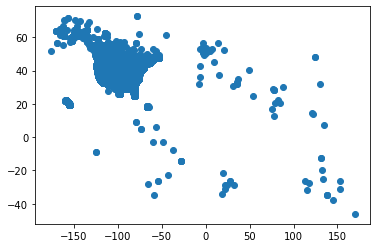

In [86]:
plt.scatter(statenonull['longitude '], statenonull['latitude'])

In [116]:
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from tqdm._tqdm_notebook import tqdm_notebook

contrynull['geo'] = contrynull['latitude'].map(str) + ',' + contrynull['longitude '].map(str)

locator = Nominatim(user_agent='myGeocoder', timeout=10)
rgeocode = RateLimiter(locator.reverse, min_delay_seconds=0.001)

contrynull['country'] = contrynull['geo'].progress_apply(rgeocode)
#df.head()

<ipython-input-116-55e99251b0d9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contrynull['geo'] = contrynull['latitude'].map(str) + ',' + contrynull['longitude '].map(str)


KeyboardInterrupt: 